# Heineken - Data Science Use Case 2024
## 👤: Paulo Cezar Cabral Junior

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 🔍 Data exploration

First Look

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,...,pH,Extract,Color,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,Product
0,0,2449959642,10/22/2020 2:50,64.499934,16051.99658,3999.860052,67.312984,6546.750,105.408559,6482.25,...,7.296127,15.309445,14.156956,3126.100,729.925,14.494583,908.375,6.1275,6.0200,AMST
1,1,2449959689,10/22/2020 5:44,64.500000,16067.85283,4004.256635,66.933041,6889.675,105.303989,6654.25,...,7.219022,15.285057,14.270939,3135.775,733.150,14.494583,908.375,6.1275,6.0200,AMST
2,2,2449959720,10/22/2020 7:00,64.177513,16062.20908,3996.957605,67.177043,6614.475,105.237753,7363.75,...,7.182910,14.155171,13.269140,3492.675,912.675,14.494583,908.375,6.1275,6.0200,AMST
3,3,2449960768,10/25/2020 17:38,21.392395,23908.36533,0.000000,67.916019,6718.750,105.202896,8825.75,...,NaN,14.855308,14.353551,3935.575,883.650,14.494583,908.375,6.1275,6.5575,HNK
4,4,2449960799,10/25/2020 19:33,21.177513,24607.28750,0.000000,67.037616,6357.550,105.237753,8213.00,...,NaN,15.270026,13.847422,3717.350,824.525,14.494583,908.375,6.5575,6.1275,HNK


Checking brands quantity

In [3]:
df['Product'].value_counts()

Product
AMST    180
HNK      20
Name: count, dtype: int64

Just rearranging the columns

In [4]:
df = df.loc[:,[
    'Unnamed: 0',
    'Job ID',
    'Date/Time',
    'Roast amount (kg)',
    '1st malt amount (kg)',
    '2nd malt amount (kg)',
    'MT - Temperature',
    'MT - Time',
    'WK - Temperature',
    'WK - Steam',
    'WK - Time',
    'Total cold wort',
    'Extract',
    'WOC - Time',
    'WHP Transfer - Time',
    'WHP Rest - Time',
    'Roast color',
    '1st malt color',
    '2nd malt color',
    'pH',
    'Product',
    'Color'
]].copy()

df.head()

,Unnamed: 0,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,...,Extract,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,pH,Product,Color
0,0,2449959642,10/22/2020 2:50,64.499934,16051.99658,3999.860052,67.312984,6546.750,105.408559,6482.25,...,15.309445,3126.100,729.925,14.494583,908.375,6.1275,6.0200,7.296127,AMST,14.156956
1,1,2449959689,10/22/2020 5:44,64.500000,16067.85283,4004.256635,66.933041,6889.675,105.303989,6654.25,...,15.285057,3135.775,733.150,14.494583,908.375,6.1275,6.0200,7.219022,AMST,14.270939
2,2,2449959720,10/22/2020 7:00,64.177513,16062.20908,3996.957605,67.177043,6614.475,105.237753,7363.75,...,14.155171,3492.675,912.675,14.494583,908.375,6.1275,6.0200,7.182910,AMST,13.269140
3,3,2449960768,10/25/2020 17:38,21.392395,23908.36533,0.000000,67.916019,6718.750,105.202896,8825.75,...,14.855308,3935.575,883.650,14.494583,908.375,6.1275,6.5575,NaN,HNK,14.353551
4,4,2449960799,10/25/2020 19:33,21.177513,24607.28750,0.000000,67.037616,6357.550,105.237753,8213.00,...,15.270026,3717.350,824.525,14.494583,908.375,6.5575,6.1275,NaN,HNK,13.847422


## 🧹 Data cleanning

Removing unnecessary columns

In [5]:
df.drop(
    columns=[
        'Unnamed: 0',
        'Date/Time'
    ],
    axis=1,
    inplace=True
)

df.head()

,Job ID,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,WK - Time,Total cold wort,Extract,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,pH,Product,Color
0,2449959642,64.499934,16051.99658,3999.860052,67.312984,6546.750,105.408559,6482.25,6365.075,958.900,15.309445,3126.100,729.925,14.494583,908.375,6.1275,6.0200,7.296127,AMST,14.156956
1,2449959689,64.500000,16067.85283,4004.256635,66.933041,6889.675,105.303989,6654.25,5929.700,963.200,15.285057,3135.775,733.150,14.494583,908.375,6.1275,6.0200,7.219022,AMST,14.270939
2,2449959720,64.177513,16062.20908,3996.957605,67.177043,6614.475,105.237753,7363.75,6366.150,1088.975,14.155171,3492.675,912.675,14.494583,908.375,6.1275,6.0200,7.182910,AMST,13.269140
3,2449960768,21.392395,23908.36533,0.000000,67.916019,6718.750,105.202896,8825.75,6710.150,1127.675,14.855308,3935.575,883.650,14.494583,908.375,6.1275,6.5575,NaN,HNK,14.353551
4,2449960799,21.177513,24607.28750,0.000000,67.037616,6357.550,105.237753,8213.00,6397.325,1122.300,15.270026,3717.350,824.525,14.494583,908.375,6.5575,6.1275,NaN,HNK,13.847422


### • Fixing missing data

checking if the data is clean

In [6]:
df.isna().sum()

Job ID                   0
Roast amount (kg)        3
1st malt amount (kg)     0
2nd malt amount (kg)     0
MT - Temperature         0
MT - Time                0
WK - Temperature         0
WK - Steam               0
WK - Time                0
Total cold wort          0
Extract                  0
WOC - Time               0
WHP Transfer - Time      0
WHP Rest - Time          0
Roast color              0
1st malt color           0
2nd malt color           0
pH                      11
Product                  0
Color                   30
dtype: int64

Checking brands on empty Colors

In [7]:
df[df['Color'].isna()]['Product'].value_counts()

Product
AMST    30
Name: count, dtype: int64

I decided to remove the Product column because the entire manufacturing is the same for both brands

In [8]:
df.drop(
    'Product',
    axis=1,
    inplace=True
)

clearing empty data and save empty colors to predict later

In [9]:
df.dropna(
    subset=[
        'Roast amount (kg)',
        'pH'
    ],
    inplace=True
)
df_to_predict_later = df[df['Color'].isna()].copy()
df.dropna(subset=['Color'], inplace=True)

In [10]:
df_to_predict_later.head()

,Job ID,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,WK - Time,Total cold wort,Extract,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,pH,Color
38,2449962739,23.327513,13994.39304,6072.513855,77.303098,6717.675,105.098326,6869.25,7091.775,958.900,15.134790,3159.425,732.075,14.494583,908.375,6.1275,6.02,5.565181,NaN
39,2449962755,27.627579,14021.05283,6075.093750,67.072473,6996.100,105.168039,6460.75,6411.300,954.600,15.413623,3116.425,729.925,14.494583,908.375,6.1275,6.02,5.647166,NaN
40,2449962807,23.327579,13992.20000,6074.330542,67.107329,7225.075,105.237753,6675.75,6717.675,959.975,15.787452,3129.325,731.000,14.494583,908.375,6.1275,6.02,5.652046,NaN
41,2449962840,64.392526,14014.87158,6076.383960,66.933041,6561.800,105.303989,6428.50,6543.525,964.275,15.677505,3139.000,729.925,14.494583,908.375,6.1275,6.02,5.675958,NaN
42,2449962859,24.509987,14001.43408,6076.921460,66.901670,6669.300,105.338846,6557.50,6579.000,963.200,15.653609,3141.150,735.300,14.494583,908.375,6.1275,6.02,5.671078,NaN


Here I saved the Job ID for later and removed it as it is also an unnecessary column

In [11]:
job_id_to_concat_later = df_to_predict_later['Job ID']

df.drop(
    'Job ID',
    axis=1,
    inplace=True
)

df_to_predict_later.drop(
    'Job ID',
    axis=1,
    inplace=True
)

checking again if the data is clean

In [12]:
df.isna().sum()

Roast amount (kg)       0
1st malt amount (kg)    0
2nd malt amount (kg)    0
MT - Temperature        0
MT - Time               0
WK - Temperature        0
WK - Steam              0
WK - Time               0
Total cold wort         0
Extract                 0
WOC - Time              0
WHP Transfer - Time     0
WHP Rest - Time         0
Roast color             0
1st malt color          0
2nd malt color          0
pH                      0
Color                   0
dtype: int64

In [13]:
df_to_predict_later.isna().sum()

Roast amount (kg)        0
1st malt amount (kg)     0
2nd malt amount (kg)     0
MT - Temperature         0
MT - Time                0
WK - Temperature         0
WK - Steam               0
WK - Time                0
Total cold wort          0
Extract                  0
WOC - Time               0
WHP Transfer - Time      0
WHP Rest - Time          0
Roast color              0
1st malt color           0
2nd malt color           0
pH                       0
Color                   30
dtype: int64

### • Outliers removal

Checking the histogram of the target column

<Axes: xlabel='Color', ylabel='Count'>

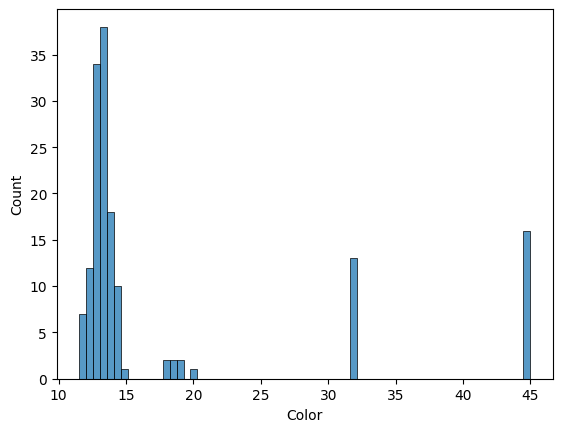

In [14]:
sns.histplot(df['Color'])

removing outliers found

<Axes: xlabel='Color', ylabel='Count'>

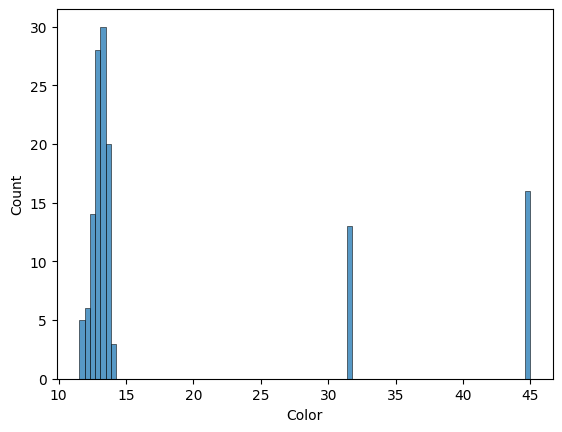

In [15]:
df = df.drop(df[
    (df['Color'] > 14) &
     (df['Color'] < 25)
].index)

sns.histplot(df['Color'])

checking scatter plots from RFE columns

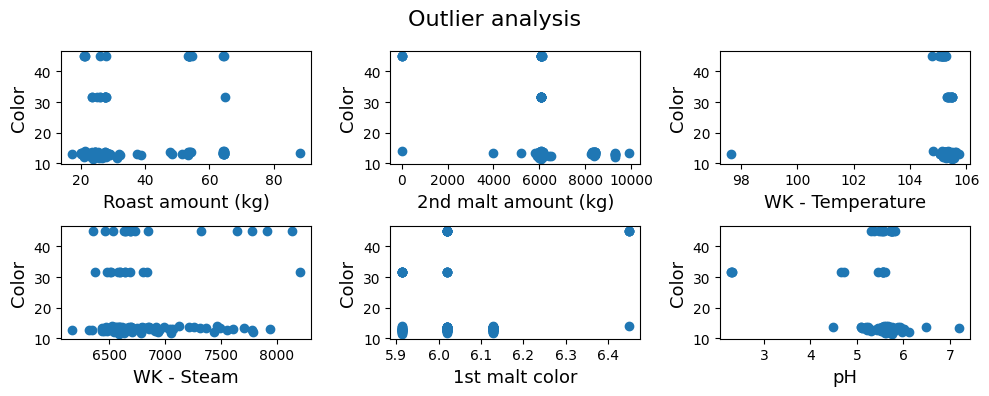

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(10, 4))

colunas = ['Roast amount (kg)', '2nd malt amount (kg)', 'WK - Temperature',
       'WK - Steam', '1st malt color', 'pH', 'Color']

for i, ax in enumerate(axs.flatten()):
    ax.scatter(
        x=df[colunas[i]],
        y=df['Color']
    )
    ax.set_ylabel('Color', fontsize=13)
    ax.set_xlabel(colunas[i], fontsize=13)

fig.suptitle('Outlier analysis', fontsize=16)

plt.tight_layout()
plt.show()

removing outliers found

In [17]:
df = df.drop(df[
    df['WK - Temperature'] < 98
].index)

df = df.drop(df[
    df['pH'] < 3
].index)

### ⚙️ Feature Engineering

Identifying highly correlated columns

<Axes: >

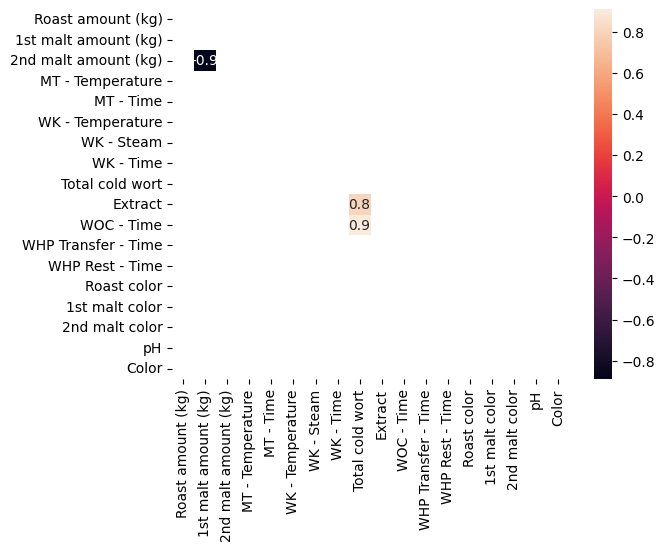

In [18]:
matriz_correlacao = df.corr()

# sns.heatmap(
#     matriz_correlacao[
#         (abs(matriz_correlacao) > 0.8) &
#         (matriz_correlacao != 1.00)
#     ],
#     annot=True,
#     fmt='.1f'
# )

mask = np.zeros_like(matriz_correlacao, dtype=bool)
mask[np.triu_indices_from(mask)] = True
matriz_correlacao[mask] = np.nan

matriz_correlacao[abs(matriz_correlacao) < 0.8] = np.nan

# (
#     matriz_correlacao
#     .style
#     .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
#     .highlight_null(color='#f1f1f1')  # Color NaNs grey
#     .format(precision=2)
# )


sns.heatmap(
    matriz_correlacao,
    annot=True,
    fmt='.1f'
)

In [19]:


limiar_correlacao = 0.8
pares_correlacionados = []

for i in range(len(matriz_correlacao.columns)):
    for j in range(i):
        if abs(matriz_correlacao.iloc[i, j]) > limiar_correlacao:
            par = (matriz_correlacao.columns[i], matriz_correlacao.columns[j], abs(matriz_correlacao.iloc[i, j]))
            pares_correlacionados.append(par)

lista_ordenada = sorted(pares_correlacionados, key=lambda x: x[2], reverse=True)
for par in lista_ordenada:
    print(f'{par[0].ljust(25)} {par[1].ljust(25)} {par[2]}')

WOC - Time                Total cold wort           0.9101011131612274
2nd malt amount (kg)      1st malt amount (kg)      0.8883870331676128
Extract                   Total cold wort           0.8110397480034063


Removing one of the highly correlated columns

In [20]:
to_remove_again_late = [
    '1st malt amount (kg)',
    'Extract',
    'WOC - Time'
]

df.drop(
    to_remove_again_late,
    axis=1,
    inplace=True
)

Removing columns shown as less important by RFE

In [21]:
rfe_list = [
    'MT - Temperature',
    'MT - Time',
    'WK - Time',
    'Total cold wort',
    'WHP Transfer - Time',
    'WHP Rest - Time',
    'Roast color',
    '2nd malt color'
]

df = df.drop(
    rfe_list,
    axis=1
)

to_remove_again_late.extend(rfe_list)

df.columns

Index(['Roast amount (kg)', '2nd malt amount (kg)', 'WK - Temperature',
       'WK - Steam', '1st malt color', 'pH', 'Color'],
      dtype='object')

## ⚖️ Values normalization

Here i used MinMaxScaler to normalize the data

In [22]:
scaler = MinMaxScaler()

df = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns
)

df.head()

,Roast amount (kg),2nd malt amount (kg),WK - Temperature,WK - Steam,1st malt color,pH,Color
0,0.662100,0.403264,0.483138,0.587302,0.4,1.000000,0.051618
1,0.666667,0.621544,0.370780,0.433862,0.4,0.390755,0.046678
2,0.668188,0.607646,0.408233,0.280423,0.4,0.413868,0.046678
3,0.662100,0.612449,0.370780,0.174603,0.4,0.408631,0.073222
4,0.153729,0.612460,0.445685,0.132275,0.4,0.415674,0.053775


## 🦾 Trainnig the model

#### • Model building

In [23]:
X = df.drop('Color', axis=1)
y = df['Color']

print(f'Total lines for training: {X.shape[0]}')

Total lines for training: 130


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
modelo = RandomForestRegressor(n_estimators=100, random_state=42)

# modelo.fit(X_train, y_train)
# previsoes = modelo.predict(X_test)

In [26]:
rfecv = RFECV(
    estimator=modelo,
    cv=4,
    step=1,
    scoring='neg_mean_squared_error'
)

rfecv.fit(X_train, y_train)

X_train_rfe = rfecv.transform(X_train)
X_test_rfe = rfecv.transform(X_test)

print(f'Quantidade de features selecionadas: {rfecv.n_features_}')
print('Colunas selecionadas:')
[col for col, is_selected in zip(X.columns, rfecv.support_) if is_selected]

Quantidade de features selecionadas: 6
Colunas selecionadas:


['Roast amount (kg)',
 '2nd malt amount (kg)',
 'WK - Temperature',
 'WK - Steam',
 '1st malt color',
 'pH']

In [27]:
modelo.fit(X_train_rfe, y_train)
previsoes = modelo.predict(X_test_rfe)

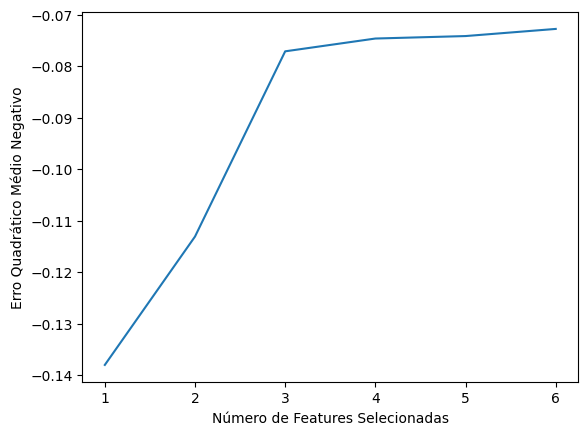

In [28]:
plt.figure()
plt.xlabel("Número de Features Selecionadas")
plt.ylabel("Erro Quadrático Médio Negativo")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

I'm using RFE to know the columns who had the most importance to the training and use these at the beginning of this code

In [29]:
rfe = RFE(modelo, n_features_to_select=6)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

X.columns[rfe.support_]

Index(['Roast amount (kg)', '2nd malt amount (kg)', 'WK - Temperature',
       'WK - Steam', '1st malt color', 'pH'],
      dtype='object')

#### • Model performance

In [30]:
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f"Mean squared error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean squared error: 0.03
R2 Score: 0.68


## 🔮 Predicting empyt Colors

recleaning

In [31]:
df_to_predict_later.drop(
    to_remove_again_late,
    axis=1,
    inplace=True
)

df_to_predict_later.drop('Color', axis=1, inplace=True)

original_indexs = df_to_predict_later.index

rescaling data

In [32]:
scaler2 = MinMaxScaler()

df_to_predict_later = pd.DataFrame(
    scaler2.fit_transform(df_to_predict_later),
    columns=df_to_predict_later.columns
)

predicting and saving index

In [33]:
previsoes_vazios = modelo.predict(df_to_predict_later)

job_id_to_concat_later.reset_index(drop=True, inplace=True)

c:\Users\paulo\dev\projetos\PESSOAL\heineken\.venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


returning original values

In [34]:
df_to_predict_later['Color'] = previsoes_vazios

inver_new_data = scaler.inverse_transform(df_to_predict_later)

result_df = pd.DataFrame(inver_new_data, columns=df_to_predict_later.columns)

assembling final dataframe

In [35]:
df_to_predict_later = pd.concat([job_id_to_concat_later, result_df],axis=1)
df_to_predict_later.index = original_indexs

Here's the predictions for the empty color data

In [36]:
df_to_predict_later

,Job ID,Roast amount (kg),2nd malt amount (kg),WK - Temperature,WK - Steam,1st malt color,pH,Color
38,2449962739,24.109562,17.137594,104.788100,7324.333333,6.4500,5.098154,29.239699
39,2449962755,30.804213,27.820063,104.958866,6371.166667,6.4500,5.555386,30.149873
40,2449962807,24.109664,24.659878,105.129632,6872.833333,6.4500,5.582602,24.580563
41,2449962840,88.042526,33.162385,105.291879,6295.916667,6.4500,5.715961,24.821361
42,2449962859,25.950522,35.387990,105.377262,6596.916667,6.4500,5.688746,23.131180
43,2449962896,88.042424,8.902420,105.377262,6421.333333,6.4500,5.715961,24.510343
44,2449962907,88.042424,29.823978,105.548027,6521.666667,6.4500,7.182910,25.066562
45,2449962972,87.875101,9.793532,105.633410,7249.083333,6.4500,5.258729,24.220140
46,2449963016,27.958907,0.000000,105.633410,6170.500000,6.4500,5.958187,24.922315
47,2449963045,29.297797,19.541421,105.633410,6596.916667,6.4500,6.012618,24.240265
